In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Auto.csv")

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

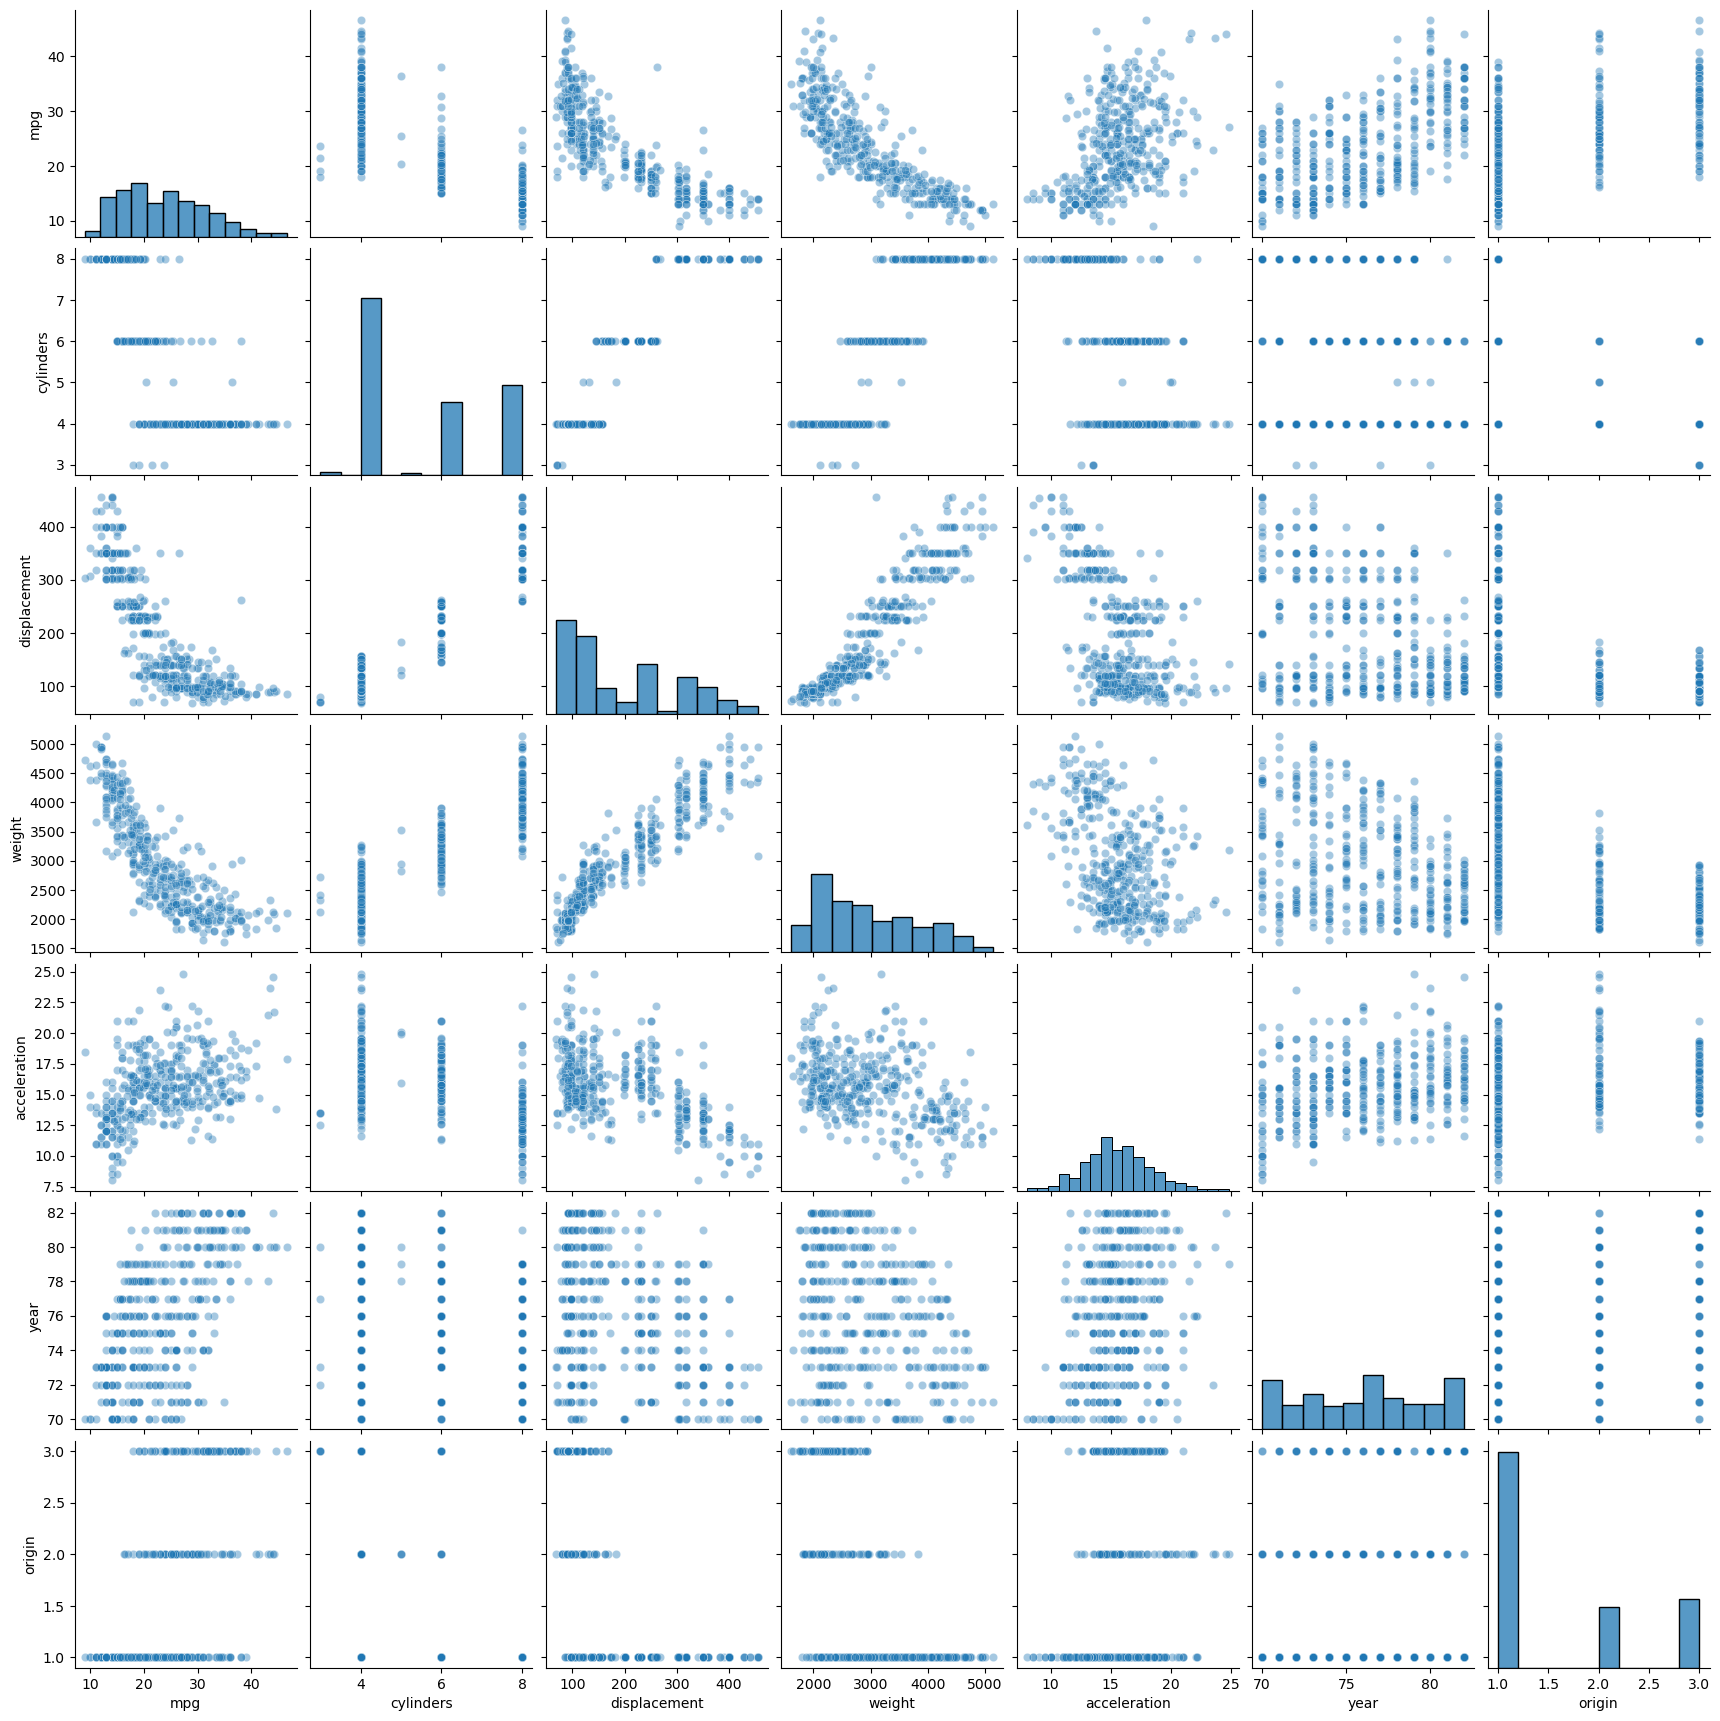

In [8]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.4})

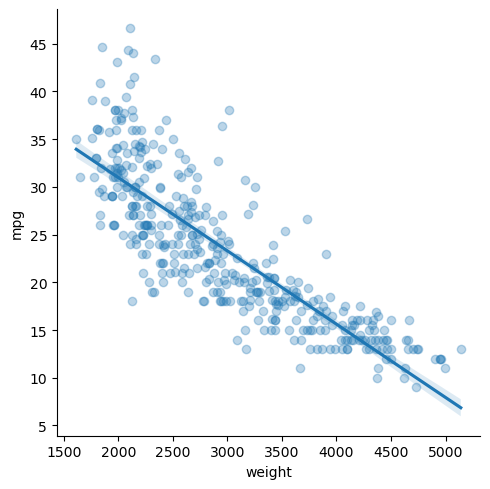

In [9]:
sns.lmplot(x="weight",
          y = "mpg",
          data = df,
          scatter_kws={'alpha':0.3})

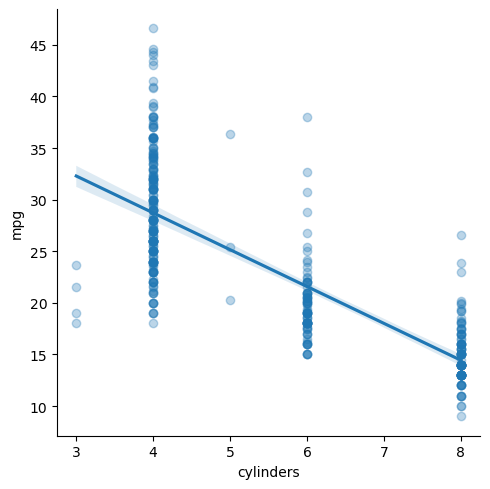

In [10]:
sns.lmplot(x="cylinders",
          y = "mpg",
          data = df,
          scatter_kws={'alpha':0.3})

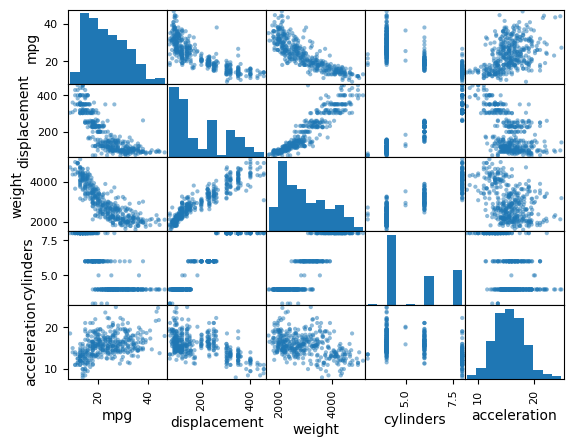

In [11]:
pd.plotting.scatter_matrix(df[['mpg',
                                 'displacement',
                                 'weight', 
                                 'cylinders',
                                 'acceleration']]);

In [12]:
from sklearn.model_selection import train_test_split

In [19]:
X = df[['cylinders', 'displacement', 'weight', 'year']]
y = df['mpg']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train

,cylinders,displacement,weight,year
17,6,200.0,2587,70
168,4,140.0,2639,75
24,6,199.0,2648,70
126,6,200.0,2875,74
395,4,120.0,2625,82
...,...,...,...,...
71,3,70.0,2330,72
106,8,350.0,4499,73
270,4,134.0,2515,78
348,4,89.0,2050,81


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
lm.coef_

array([-0.36112189,  0.00468758, -0.00664554,  0.74398992])

In [26]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coef'])
print(cdf)

                  Coef
cylinders    -0.361122
displacement  0.004688
weight       -0.006646
year          0.743990


In [53]:
import statsmodels.api as sm

In [54]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     178.3
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           9.38e-75
Time:                        16:40:59   Log-Likelihood:                -781.45
No. Observations:                 277   AIC:                             1573.
Df Residuals:                     272   BIC:                             1591.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.7054      2.313     18.460   

In [27]:
predictions = lm.predict(X_test)

In [28]:
predictions

array([25.89598721, 31.40127296, 30.29409313, 25.13591895, 13.86085261,
       31.49177682, 12.50593344, 12.66669339, 19.43945698, 29.49218232,
       13.05511761, 28.70982893, 21.39599942, 10.7887225 , 31.79360197,
       26.84768208,  6.42296913, 25.65477314, 26.40334058, 28.79915683,
       19.63586325, 32.67330134, 26.29841196, 14.96540631,  8.31626947,
       25.39821786, 20.51020618, 21.86169405, 31.02706085, 21.990637  ,
       26.24382435, 33.85285656, 27.04764735, 26.43531272, 23.62500802,
       32.07303727, 22.034559  , 25.62165413, 28.30875725, 29.36435049,
        7.83064955, 32.68246929, 27.26754895, 27.73975251, 26.85061891,
       20.82058876,  9.64016063, 23.65457311, 31.61093587, 23.65354815,
       30.85087917,  9.76561976, 21.62073983,  8.14651434, 24.61153134,
       18.87042913, 24.79369084, 20.48883095, 28.00396053, 12.13124927,
       22.96113319, 24.7242062 , 27.65425858, 26.6914368 , 26.69795574,
       28.31079574, 32.07772485, 29.29986466, 24.61271786, 12.92

<Axes: title={'center': 'MPG vs Model Predictions'}, xlabel='Predictions', ylabel='mpg'>

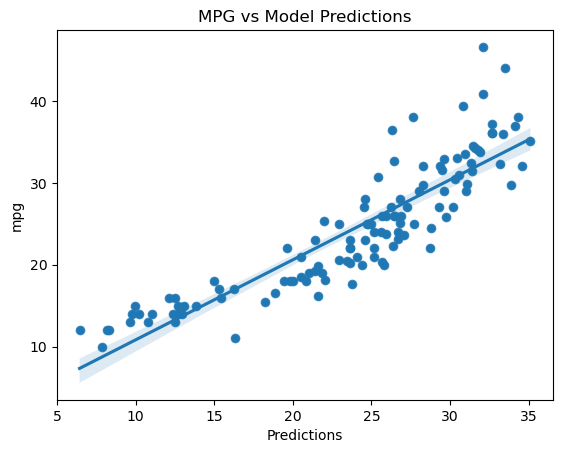

In [29]:
sns.scatterplot(x = predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("MPG vs Model Predictions")
sns.regplot(x=predictions, y=y_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [31]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  2.8864079328440573
Mean Squared Error:  13.791036419301859
RMSE:  3.7136284708222846


In [32]:
residuals = y_test - predictions

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


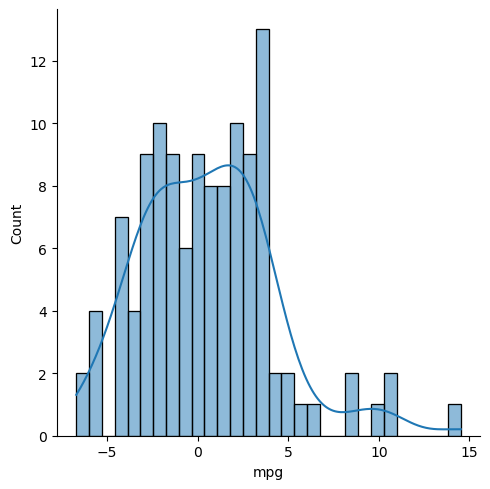

In [33]:
sns.displot(residuals, bins = 30, kde = True)

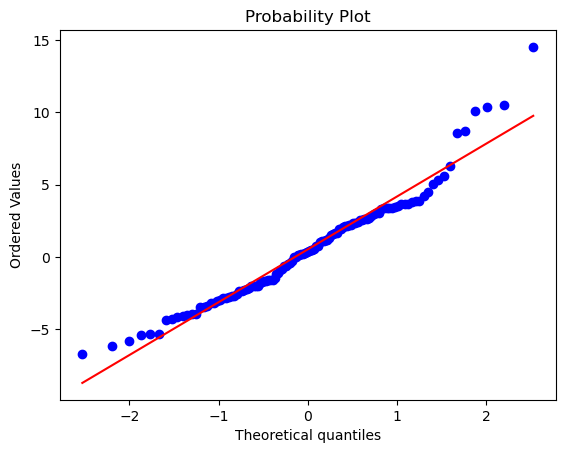

In [34]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot = pylab)
pylab.show()